## CASTRO samples for subproblem 2 of 9 dimensional problem

This Notebook runs the CASTRO algorithm for generating feasible samples for the 4 dimensional subproblem 2 the 9 dimensional problem.

As components we have the amino-based components MEL, THAM, CS, BN, where for the synthesis, the following combinations are allowed: MEL+CS, THAM+CS, MEL+THAM and all of them are allowed as single components.

It contains the following steps:
1. Initialization
2. CASTRO samples
3. Sample selection applying synthesis constraints and choosing random samples, and illustration
4. Distribution plots
5. Write results to csv files
6. Show results


written by Christina Schenk

last updated on 08/07/2024

tested on Christina's M1 Mac

#### import python packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from pathlib import Path  
from sklearn.preprocessing import StandardScaler
import sys

sys.path.append('..')
from src.conditionedSampling import *
from src.plot import *
from src.utils import *

### **1. Initialization**

##### Specify the design space: lower and upper bounds for x and y, dim etc.

In [2]:
#Lower and upper bounds for x and y:
#amino-based acids:
CS_lb = 0.0
CS_ub = 1.0
MEL_lb = 0.0
MEL_ub = 1.0
THAM_lb = 0.0
THAM_ub = 1.0
BN_lb = 0.0
BN_ub = 1.0

x1_lb = MEL_lb
x1_ub = MEL_ub

x2_lb = THAM_lb
x2_ub = THAM_ub

x3_lb = CS_lb
x3_ub = CS_ub

x4_lb = BN_lb
x4_ub = BN_ub
#dimension of design space:
dim = 4
bounds = [[x1_lb,x1_ub],[x2_lb,x2_ub], [x3_lb,x3_ub], [x4_lb,x4_ub]]
#number of samples
n_samp = 100

### **2. CASTRO samples** 
#### Collect samples for all permutations of bounds (all selected or subset of samples selected with checking for distance)

#### Calculate all permutations of bounds

In [3]:
all_perms = []
all_perms += permutations(range(dim))

### Collect samples for all permutations of bounds (all selected or subset of samples selected with checking for distance)

In [4]:
#dimension of design space:
#dim = 4
tot_samp = 360
prev_bounds = [[x1_lb,x1_ub], [x2_lb,x2_ub], [x3_lb,x3_ub], [x4_lb,x4_ub]]
n_samp = tot_samp//len(all_perms)
tol_norm = 5e-1
num_select = 4
max_rej = n_samp//4

In [5]:
#num_select = 5
all_select = True
max_rej = n_samp//1
all_val_samples, all_val_samples_mdu = sample_with_bound_permutations(prev_bounds=prev_bounds, n_samp=n_samp, tol_norm=tol_norm, all_select=all_select, num_select=num_select, max_rej = max_rej, dim=dim)

NUM_METH 0 running
###################New Method#######################
NUM_METH 1 running


### **3. Sample selection applying synthesis constraints and choosing random samples, and illustration**

#### Import data and format

In [6]:
filename = './data/Bank_Data-2808_mod_corrected.csv'
df = pd.read_csv(filename, sep=';', decimal=",")
df = df.div(100.)
print(df, len(df))
data_array = np.zeros((len(df),dim))
data_array = np.column_stack((df['Mel'].to_numpy(), df['THAM'], df['CS'], df['BN']))#
data_array

    PA-56    HNT    PhA   CS   BN   THAM   CaBO   ZnBO    Mel  met-based   
0    1.00  0.000  0.000  0.0  0.0  0.000  0.000  0.000  0.000      0.000  \
1    1.00  0.000  0.000  0.0  0.0  0.000  0.000  0.000  0.000      0.000   
2    0.95  0.000  0.017  0.0  0.0  0.033  0.000  0.000  0.000      0.000   
3    0.95  0.000  0.017  0.0  0.0  0.017  0.000  0.017  0.000      0.017   
4    0.95  0.000  0.017  0.0  0.0  0.017  0.017  0.000  0.000      0.017   
..    ...    ...    ...  ...  ...    ...    ...    ...    ...        ...   
70   0.90  0.050  0.000  0.0  0.0  0.000  0.000  0.000  0.050      0.050   
71   0.97  0.020  0.000  0.0  0.0  0.000  0.000  0.000  0.010      0.020   
72   0.95  0.033  0.000  0.0  0.0  0.000  0.000  0.000  0.017      0.033   
73   0.93  0.047  0.000  0.0  0.0  0.000  0.000  0.000  0.023      0.047   
74   0.90  0.067  0.000  0.0  0.0  0.000  0.000  0.000  0.033      0.067   

    am-based  
0      0.000  
1      0.000  
2      0.033  
3      0.017  
4      0.017

array([[0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.033, 0.   , 0.   ],
       [0.   , 0.017, 0.   , 0.   ],
       [0.   , 0.017, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.047, 0.   , 0.   ],
       [0.   , 0.023, 0.   , 0.   ],
       [0.   , 0.023, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.067, 0.   , 0.   ],
       [0.   , 0.033, 0.   , 0.   ],
       [0.   , 0.033, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.015, 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.025, 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.035, 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
 

#### Transform data (just works if no combinations in data, otherwise needs to be adjusted), 0 1 single component samples

In [7]:
#transform data, such that the two add up to 100%:
for i in range(len(data_array)):
    if np.all(data_array[i,1:3]==0) and data_array[i,0]!=0:
        data_array[i,0] = 1 
    elif data_array[i,0]==0 and np.all(data_array[i,2:3]==0) and data_array[i,1]!=0:
        data_array[i,1] = 1
    elif np.all(data_array[i,0:1]==0) and data_array[i,2]!=0 and data_array[i,3]==0:
        data_array[i,2] = 1
    elif np.all(data_array[i,0:2]==0) and data_array[i,3]!=0:
        data_array[i,3] = 1
    elif np.all(data_array[i,0:3]==0):
        data_array[i,0:3] = 0
    else:
        data_array[i,0] = data_array[i,0]/(data_array[i,0]+data_array[i,1]+data_array[i,2]+data_array[i,3])
        data_array[i,1] = data_array[i,1]/(data_array[i,0]+data_array[i,1]+data_array[i,2]+data_array[i,3])
        data_array[i,2] = data_array[i,2]/(data_array[i,0]+data_array[i,1]+data_array[i,2]+data_array[i,3])

#### Standardize data

In [8]:
scaler = StandardScaler().fit(data_array)
data_scaled = scaler.transform(data_array)
scaler2 = StandardScaler().fit(all_val_samples)
all_val_samples_scaled = scaler2.transform(all_val_samples)
scaler3 = StandardScaler().fit(all_val_samples_mdu)
all_val_samples_mdu_scaled = scaler3.transform(all_val_samples_mdu)

In [9]:
print(len(all_val_samples))
print(len(all_val_samples_mdu))

94
184


#### Transform with PCA and plot in two dimensions for both LHS(MDU) samples and Data
#### Check variance ratios

In [10]:
pca = PCA(n_components=2)
Xt1 = pca.fit_transform(data_scaled)
print("variance ratio data", pca.explained_variance_ratio_)
print("variance ratio norm data", np.linalg.norm(pca.explained_variance_ratio_))
print(pca.components_)
Xt2 = pca.fit_transform(all_val_samples_scaled)
print("variance ratio lhs", pca.explained_variance_ratio_)
print("variance ratio norm lhs", np.linalg.norm(pca.explained_variance_ratio_))
print(pca.components_)
Xt3 = pca.fit_transform(all_val_samples_mdu_scaled)
print("variance ratio lhsmdu", pca.explained_variance_ratio_)
print("variance ratio norm lhsmdu", np.linalg.norm(pca.explained_variance_ratio_))
print(pca.components_)

variance ratio data [0.3125     0.30903868]
variance ratio norm data 0.4395010303966769
[[ 0.00000000e+00 -7.07106781e-01  7.07106781e-01 -1.82415627e-14]
 [ 8.15731806e-01 -4.08706060e-01 -4.08706060e-01  2.23681631e-02]]
variance ratio lhs [0.37366445 0.34561274]
variance ratio norm lhs 0.508992426366594
[[ 0.53252966 -0.64003336  0.44741675 -0.32647774]
 [ 0.42397703 -0.35870938 -0.59045212  0.58560853]]
variance ratio lhsmdu [0.36536181 0.32860404]
variance ratio norm lhsmdu 0.49139583790738794
[[-0.20379858  0.20227699 -0.68462961  0.66994959]
 [-0.51177826  0.78828975  0.05541255 -0.3370634 ]]


#### Scatterplot for reduced 2 dimensional PCA points

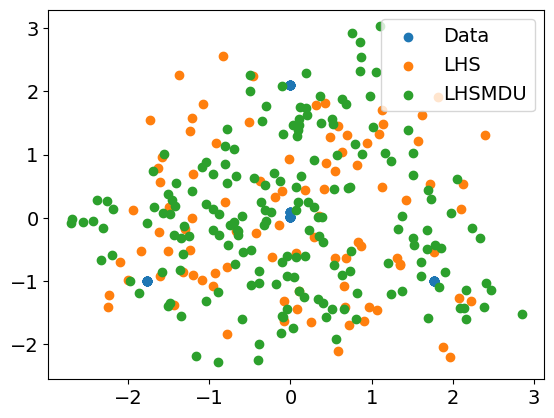

In [11]:
plot_dimred_2dims_both_methods(Xt1, Xt2, Xt3)

### Synthesis constraint, combinations allowed: Mel +CS, THAM+CS, Mel+THAM, single amino Mel, THAM, CS, BN

In [12]:
all_val_samples = apply_mixed_synthesis_constraint(all_val_samples) 
all_val_samples_mdu = apply_mixed_synthesis_constraint(all_val_samples_mdu) 

#### Make sure that sum up to 1

In [13]:
for i in range(len(all_val_samples)):
    if np.sum(all_val_samples[i,:])!=1:
        err = 1-np.sum(all_val_samples[i,:])
        ind_err = np.random.choice(np.where(all_val_samples[i,:]!=0)[0])
        all_val_samples[i,ind_err] = all_val_samples[i,ind_err]+err

for i in range(len(all_val_samples_mdu)):
    if np.sum(all_val_samples_mdu[i,:])!=1:
        err = 1-np.sum(all_val_samples_mdu[i,:])
        ind_err = np.random.choice(np.where(all_val_samples_mdu[i,:]!=0)[0])
        all_val_samples_mdu[i,ind_err] = all_val_samples_mdu[i,ind_err]+err



In [14]:
all_val_samples
len(all_val_samples)

94

### Select 90 random points

In [15]:
des_n_samp = 90

In [16]:
tol_samples_unscaled = select_des_n_samp_random_pts(all_val_samples, des_n_samp=des_n_samp)

In [17]:
tol_samples_LHSMDU_unscaled = select_des_n_samp_random_pts(all_val_samples_mdu, des_n_samp=des_n_samp)

#### Standardize data

In [18]:
scaler2 = StandardScaler().fit(tol_samples_unscaled)
tol_samples = scaler2.transform(tol_samples_unscaled)
scaler3 = StandardScaler().fit(tol_samples_LHSMDU_unscaled)
tol_samples_LHSMDU = scaler3.transform(tol_samples_LHSMDU_unscaled)

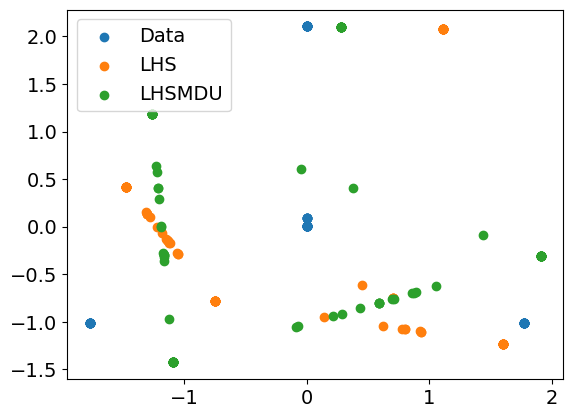

In [19]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
lhs_samples_pca = pca.fit_transform(tol_samples)
lhsmdu_samples_pca = pca.fit_transform(tol_samples_LHSMDU)

plot_dimred_2dims_both_methods(data_pca, lhs_samples_pca, lhsmdu_samples_pca)

#### Test whether all selected samples are feasible

In [20]:
for i in range(len(tol_samples_unscaled)):
    for j in range(dim):
        if tol_samples_unscaled[i,j]<prev_bounds[j][0] or tol_samples_unscaled[i,j]>prev_bounds[j][1]:
            print("not feasible", tol_samples_unscaled[i,:])
print("-------------------")
for i in range(len(tol_samples_LHSMDU_unscaled)):
    for j in range(dim):
        if tol_samples_LHSMDU_unscaled[i,j]<prev_bounds[j][0] or tol_samples_LHSMDU_unscaled[i,j]>prev_bounds[j][1]:
            print("not feasible", tol_samples_LHSMDU_unscaled[i,:])

-------------------


 ### **4. Distribution plots**

#### Distribution plots of scaled data

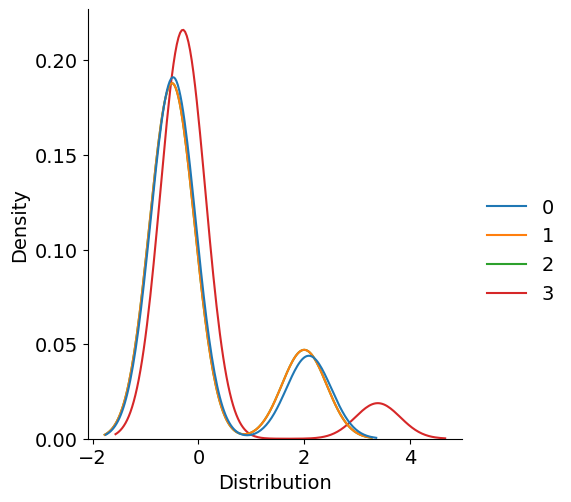

In [21]:
distplot_samples(data_scaled)

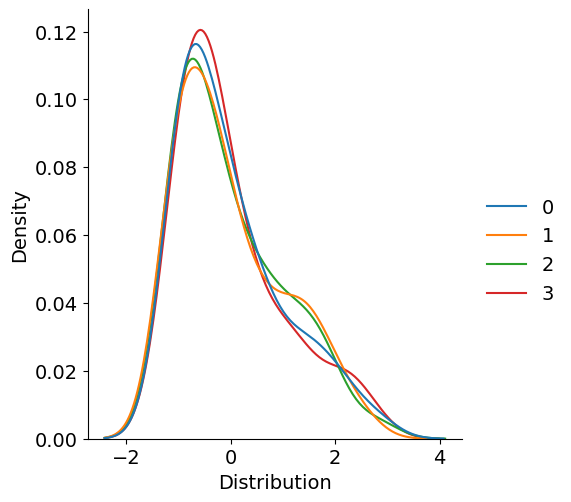

In [22]:
distplot_samples(all_val_samples_scaled)

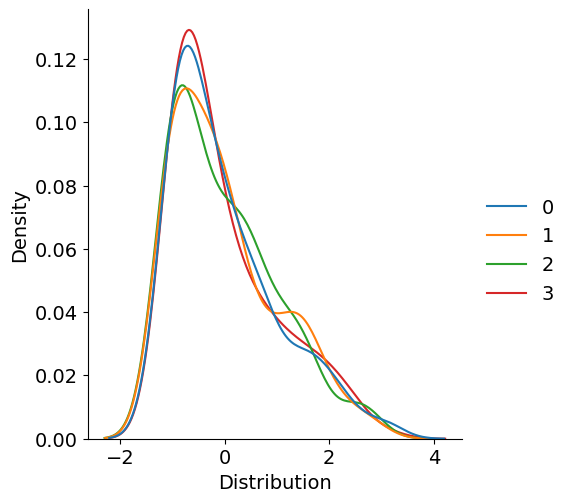

In [23]:
distplot_samples(all_val_samples_mdu_scaled)

#### Distribution subplots of scaled data

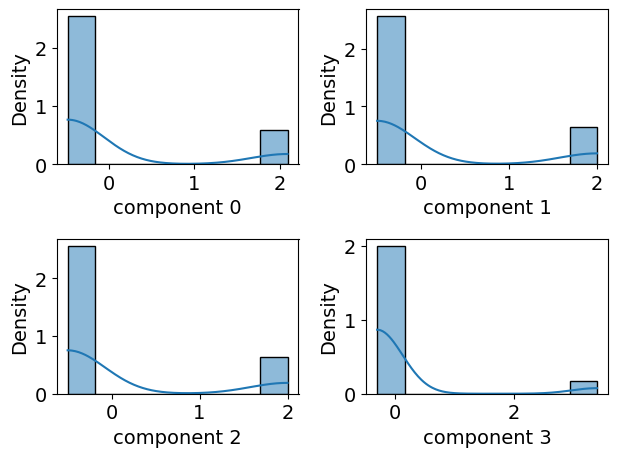

In [24]:
box_kdeplot_samples(data_scaled)

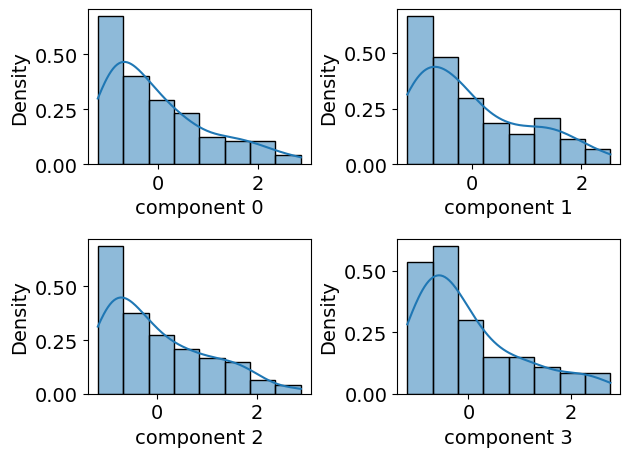

In [25]:
box_kdeplot_samples(all_val_samples_scaled)

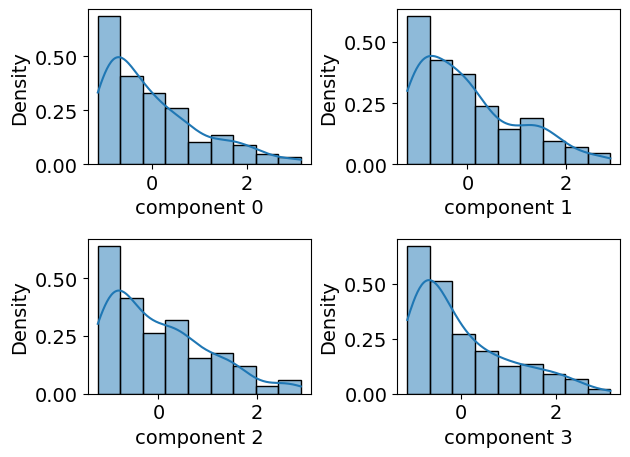

In [26]:
box_kdeplot_samples(all_val_samples_mdu_scaled)

In [27]:
print("variance data", pd.DataFrame(data_scaled).var(axis='index').to_numpy())
print("variance norm data", np.linalg.norm(pd.DataFrame(data_scaled).var(axis='index').to_numpy()))
print("variance lhs", pd.DataFrame(all_val_samples_scaled).var(axis='index').to_numpy())
print("variance norm lhs", np.linalg.norm(pd.DataFrame(all_val_samples_scaled).var(axis='index').to_numpy()))
print("variance lhsmdu", pd.DataFrame(all_val_samples_mdu_scaled).var(axis='index').to_numpy())
print("variance norm lhsmdu", np.linalg.norm(pd.DataFrame(all_val_samples_mdu_scaled).var(axis='index').to_numpy()))

variance data [1.01351351 1.01351351 1.01351351 1.01351351]
variance norm data 2.0270270270270276
variance lhs [1.01075269 1.01075269 1.01075269 1.01075269]
variance norm lhs 2.0215053763440856
variance lhsmdu [1.00546448 1.00546448 1.00546448 1.00546448]
variance norm lhsmdu 2.010928961748634


#### Distribution plots of unscaled data:

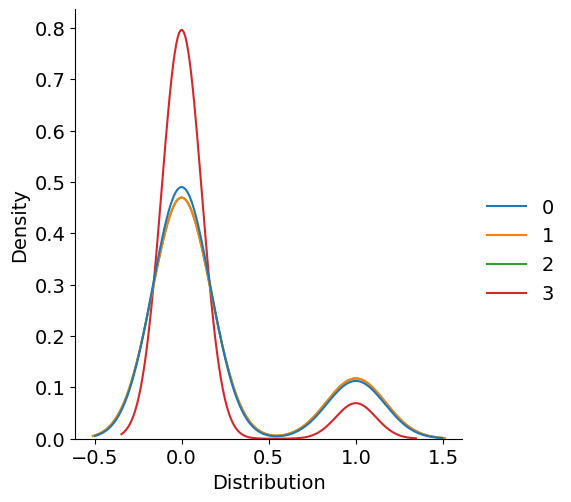

In [28]:
distplot_samples(data_array)

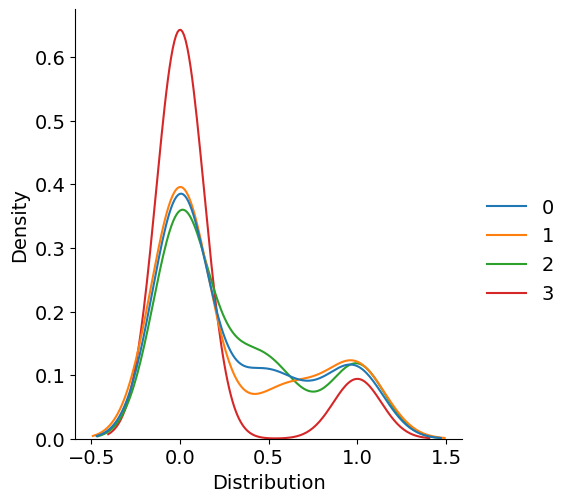

In [29]:
distplot_samples(all_val_samples)

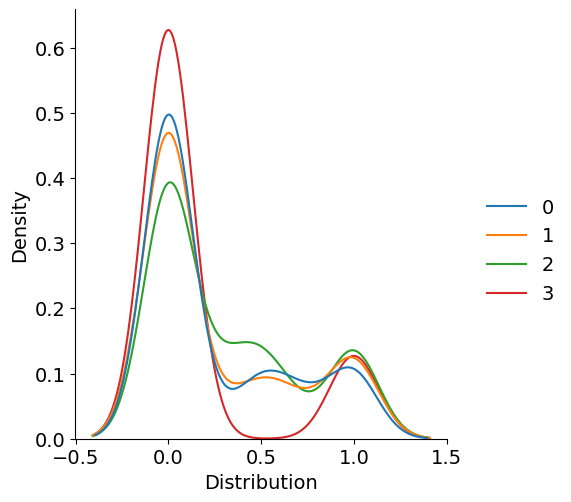

In [30]:
distplot_samples(all_val_samples_mdu)

#### Distribution subplots of unscaled data

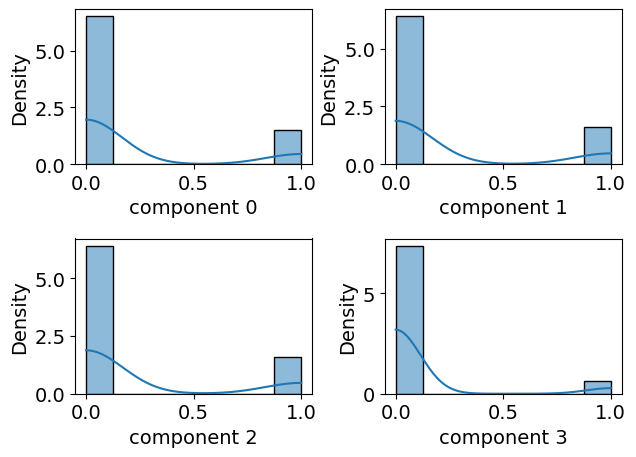

In [31]:
box_kdeplot_samples(data_array)

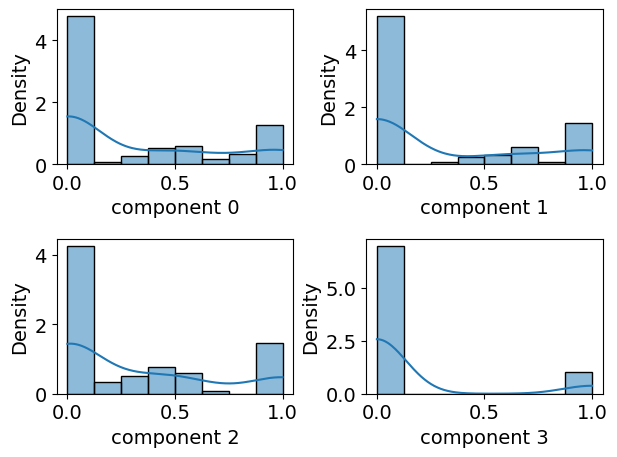

In [32]:
box_kdeplot_samples(all_val_samples)

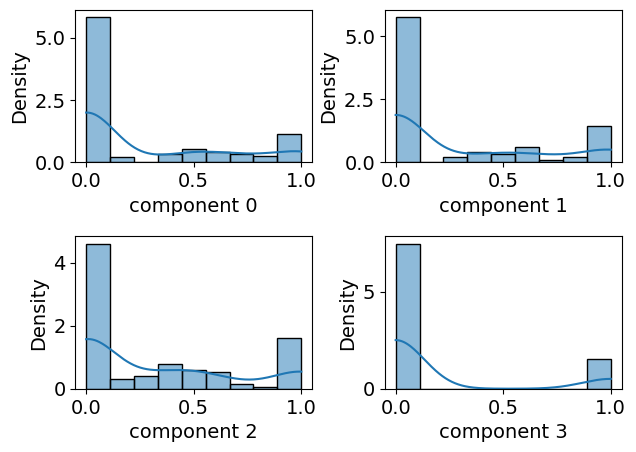

In [33]:
box_kdeplot_samples(all_val_samples_mdu)

In [34]:
print("variance data", pd.DataFrame(data_array).var(axis='index').to_numpy())
print("variance norm data", np.linalg.norm(pd.DataFrame(data_array).var(axis='index').to_numpy()))
print("variance lhs", pd.DataFrame(all_val_samples).var(axis='index').to_numpy())
print("variance norm lhs", np.linalg.norm(pd.DataFrame(all_val_samples).var(axis='index').to_numpy()))
print("variance lhsmdu", pd.DataFrame(all_val_samples_mdu).var(axis='index').to_numpy())
print("variance norm lhsmdu", np.linalg.norm(pd.DataFrame(all_val_samples_mdu).var(axis='index').to_numpy()))

variance data [0.15387387 0.16216216 0.16216216 0.07459459]
variance norm data 0.28606757292272667
variance lhs [0.15179104 0.16573494 0.14781902 0.11256005]
variance norm lhs 0.2915970184138302
variance lhsmdu [0.13936956 0.15099482 0.14787098 0.14085887]
variance norm lhsmdu 0.289707368659215


#### Distribution plots of scaled reduced data

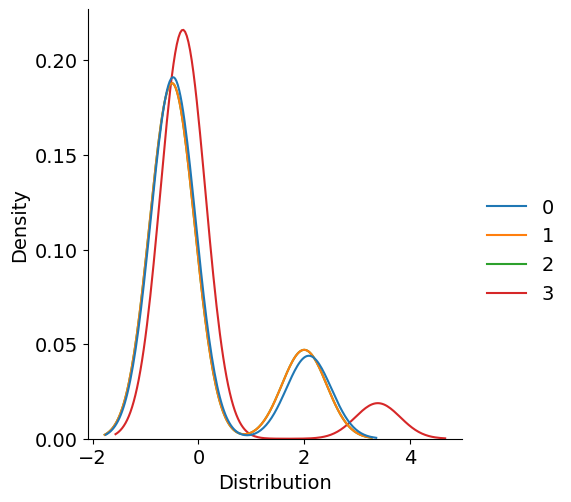

In [35]:
distplot_samples(data_scaled)

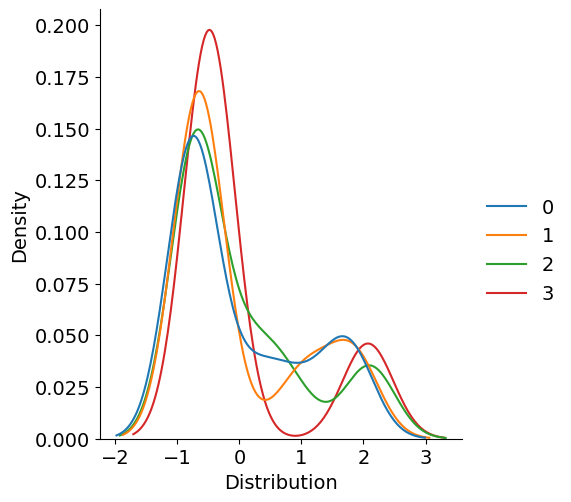

In [36]:
distplot_samples(tol_samples)

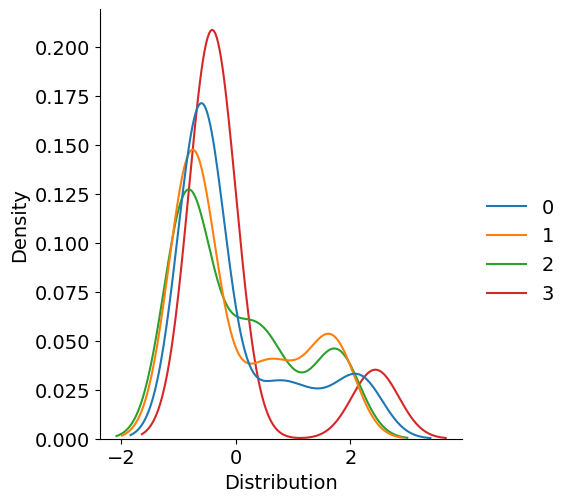

In [37]:
distplot_samples(tol_samples_LHSMDU)

#### Distribution subplots of scaled reduced data

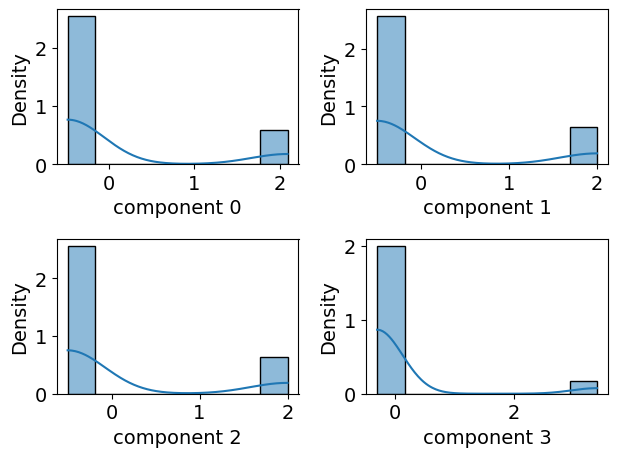

In [38]:
box_kdeplot_samples(data_scaled)

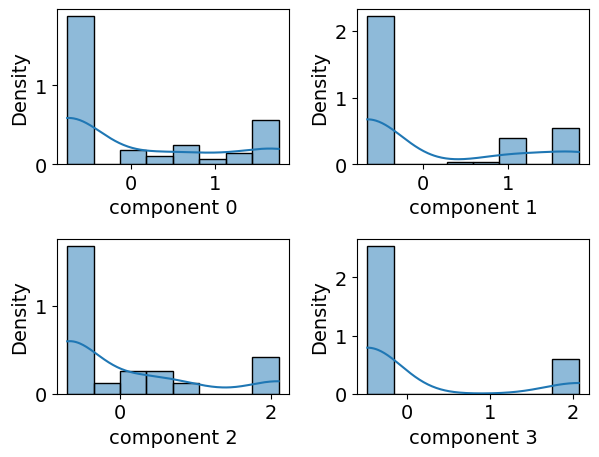

In [39]:
box_kdeplot_samples(tol_samples)


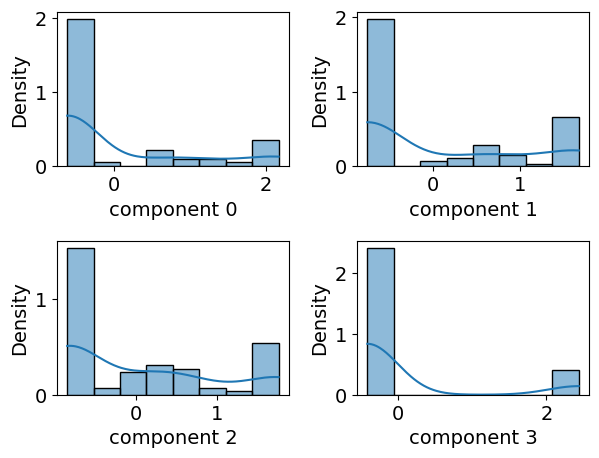

In [40]:
box_kdeplot_samples(tol_samples_LHSMDU)

#### Variances

In [41]:
print("variance data", pd.DataFrame(data_scaled).var(axis='index').to_numpy())
print("variance norm data", np.linalg.norm(pd.DataFrame(data_scaled).var(axis='index').to_numpy()))
print("variance lhs", pd.DataFrame(tol_samples).var(axis='index').to_numpy())
print("variance norm lhs", np.linalg.norm(pd.DataFrame(tol_samples).var(axis='index').to_numpy()))
print("variance lhsmdu", pd.DataFrame(tol_samples_LHSMDU).var(axis='index').to_numpy())
print("variance norm lhsmdu", np.linalg.norm(pd.DataFrame(tol_samples_LHSMDU).var(axis='index').to_numpy()))

variance data [1.01351351 1.01351351 1.01351351 1.01351351]
variance norm data 2.0270270270270276
variance lhs [1.01123596 1.01123596 1.01123596 1.01123596]
variance norm lhs 2.0224719101123596
variance lhsmdu [1.01123596 1.01123596 1.01123596 1.01123596]
variance norm lhsmdu 2.022471910112359


#### Distribution plots of unscaled reduced data:

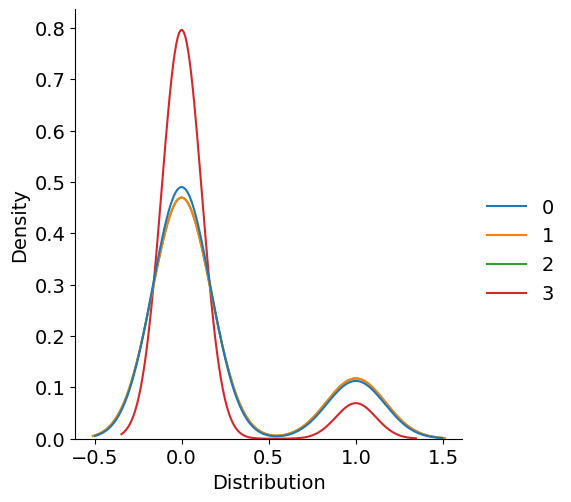

In [42]:
distplot_samples(data_array)

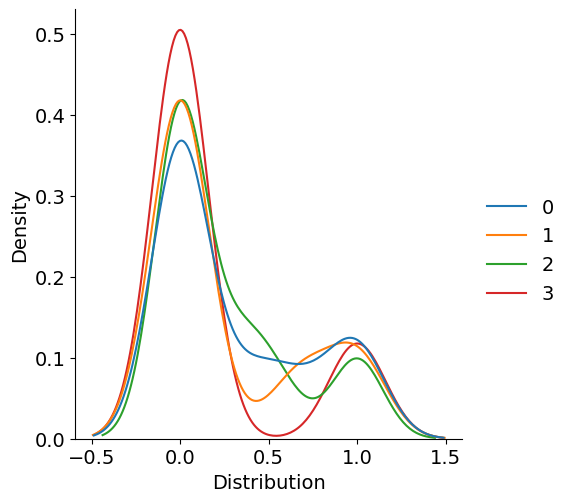

In [43]:
distplot_samples(tol_samples_unscaled)

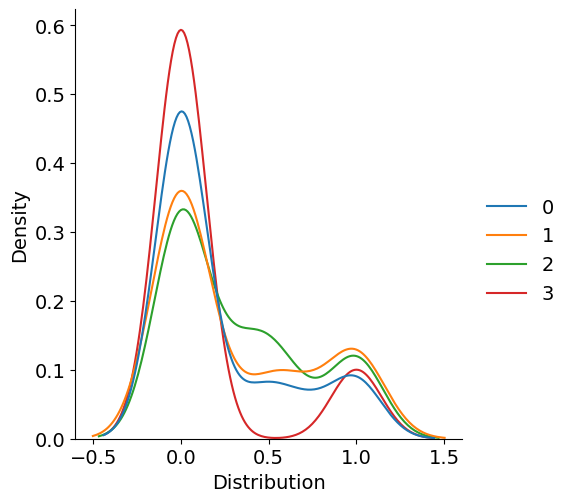

In [44]:
distplot_samples(tol_samples_LHSMDU_unscaled)

#### Distribution subplots of unscaled reduced data

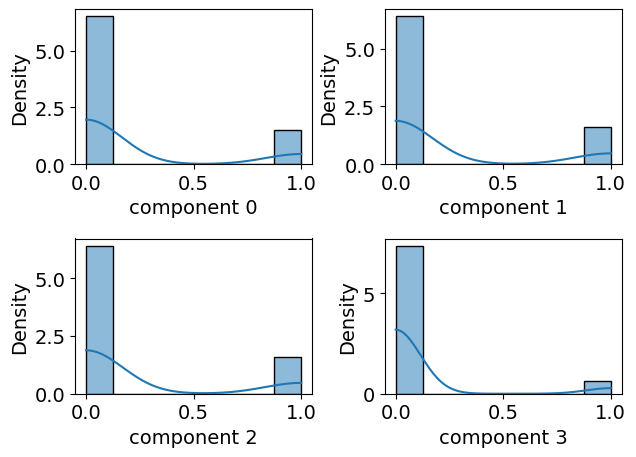

In [45]:
box_kdeplot_samples(data_array)

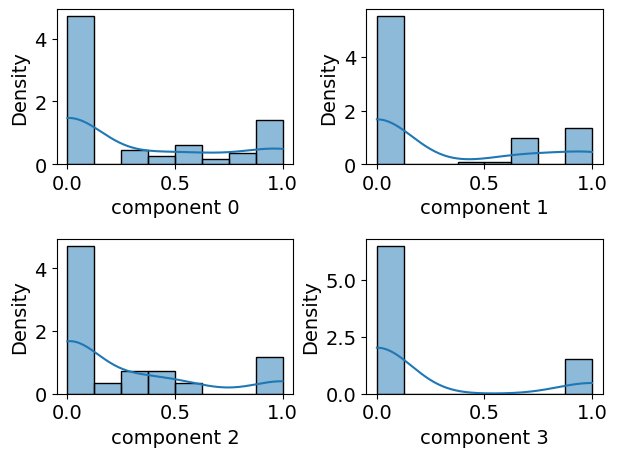

In [46]:
box_kdeplot_samples(tol_samples_unscaled)

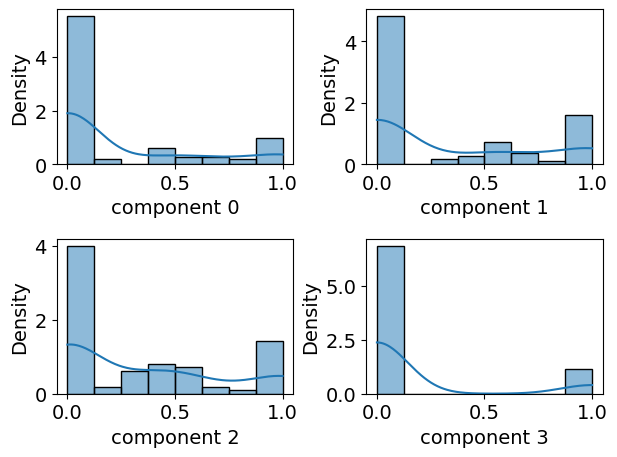

In [47]:
box_kdeplot_samples(tol_samples_LHSMDU_unscaled)

In [48]:
print("variance data", pd.DataFrame(data_array).var(axis='index').to_numpy())
print("variance norm data", np.linalg.norm(pd.DataFrame(data_array).var(axis='index').to_numpy()))
print("variance lhs", pd.DataFrame(tol_samples_unscaled).var(axis='index').to_numpy())
print("variance norm lhs", np.linalg.norm(pd.DataFrame(tol_samples_unscaled).var(axis='index').to_numpy()))
print("variance lhsmdu", pd.DataFrame(tol_samples_LHSMDU_unscaled).var(axis='index').to_numpy())
print("variance norm lhsmdu", np.linalg.norm(pd.DataFrame(tol_samples_LHSMDU_unscaled).var(axis='index').to_numpy()))

variance data [0.15387387 0.16216216 0.16216216 0.07459459]
variance norm data 0.28606757292272667
variance lhs [0.15985626 0.16358453 0.12922195 0.15493134]
variance norm lhs 0.3049851667372459
variance lhsmdu [0.13137742 0.16989621 0.14761073 0.12496879]
variance norm lhsmdu 0.2890170864716431


### **5. Write results to csv files**

In [49]:
tol_samples_unscaled_df = pd.DataFrame(tol_samples_unscaled)
tol_samples_LHSMDU_unscaled_df = pd.DataFrame(tol_samples_LHSMDU_unscaled)

In [50]:
filepath = Path('Outputs/LHS_with_new_permutations_correct_suggestions_allselected_imp_ext_subprobs_amino-based.csv')  
save_to_csv(filepath, tol_samples_unscaled_df)

filepath2 = Path('Outputs/LHSMDU_with_new_permutations_correct_suggestions_allselected_imp_ext_subprobs_amino-based.csv')  
save_to_csv(filepath2, tol_samples_LHSMDU_unscaled_df) 

In [51]:
all_val_samples_df = pd.DataFrame(all_val_samples)
all_val_samples_mdu_df = pd.DataFrame(all_val_samples_mdu)

In [52]:
filepath3 = Path('Outputs/LHS_with_new_permutations_correct_all_suggestions_allselected_imp_ext_subprobs_improve_amino-based.csv')  
save_to_csv(filepath3, all_val_samples_df)

filepath4 = Path('Outputs/LHSMDU_with_new_permutations_correct_all_suggestions_allselected_imp_ext_subprobs_improve_amino-based.csv')  
save_to_csv(filepath4, all_val_samples_mdu_df)

### **6. Show results**

In [53]:
tol_samples_unscaled_df

,0,1,2,3
0,0.000000,0.0,1.000000,0.0
1,0.652451,0.0,0.347549,0.0
2,0.000000,0.0,0.000000,1.0
3,0.000000,0.0,1.000000,0.0
4,0.000000,0.0,0.000000,1.0
...,...,...,...,...
85,1.000000,0.0,0.000000,0.0
86,0.525370,0.0,0.474630,0.0
87,0.000000,0.0,0.000000,1.0
88,0.000000,1.0,0.000000,0.0


In [54]:
tol_samples_LHSMDU_unscaled_df

,0,1,2,3
0,0.659302,0.00000,0.340698,0.0
1,1.000000,0.00000,0.000000,0.0
2,1.000000,0.00000,0.000000,0.0
3,0.000000,1.00000,0.000000,0.0
4,0.000000,0.00000,1.000000,0.0
...,...,...,...,...
85,1.000000,0.00000,0.000000,0.0
86,0.615160,0.38484,0.000000,0.0
87,0.000000,1.00000,0.000000,0.0
88,0.441058,0.00000,0.558942,0.0
